In [9]:
#source https://github.com/fastforwardlabs/keras-hello-world/blob/master/kerashelloworld.ipynb
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


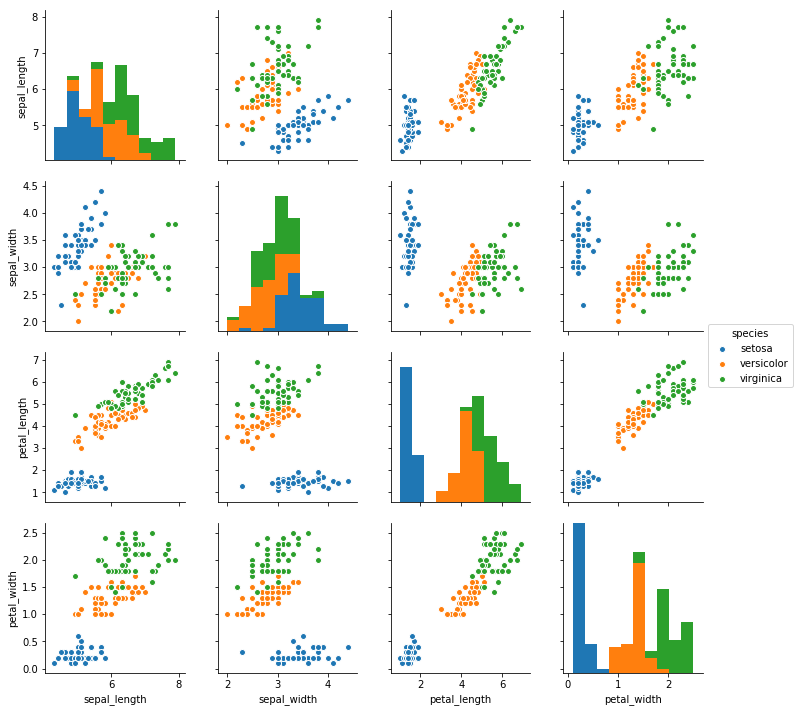

In [10]:
sns.pairplot(iris, hue='species');

In [11]:
x = iris.values[:, :4]
y = iris.values[:, 4]

In [15]:
train_X, test_X, train_y, test_y = train_test_split(x, y,  train_size = 0.5, test_size=0.5, random_state=0)

In [16]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [17]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


In [18]:
def one_hot_encode_object_array(arr):
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))
train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)    

In [19]:
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=0)

In [22]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)

In [23]:
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.99
